In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet

In [5]:
gold_df=pd.read_csv(r"C:\Users\Sangeeta\Downloads\archive (1)\Gold Price.csv")

In [6]:
gold_df

,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17
...,...,...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051,24380,-0.55
2802,2014-01-04,29279,29279,29279,29279,0,-1.51
2803,2014-01-03,29727,30031,30125,29539,3050,-0.83
2804,2014-01-02,29975,29678,30050,29678,3140,1.47


In [7]:
gold_df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [15]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
#formating into datatime, important for the analysis

In [16]:
gold_df.Date

0      2024-11-06
1      2024-11-05
2      2024-11-04
3      2024-11-01
4      2024-10-31
          ...    
2801   2014-01-06
2802   2014-01-04
2803   2014-01-03
2804   2014-01-02
2805   2014-01-01
Name: Date, Length: 2806, dtype: datetime64[ns]

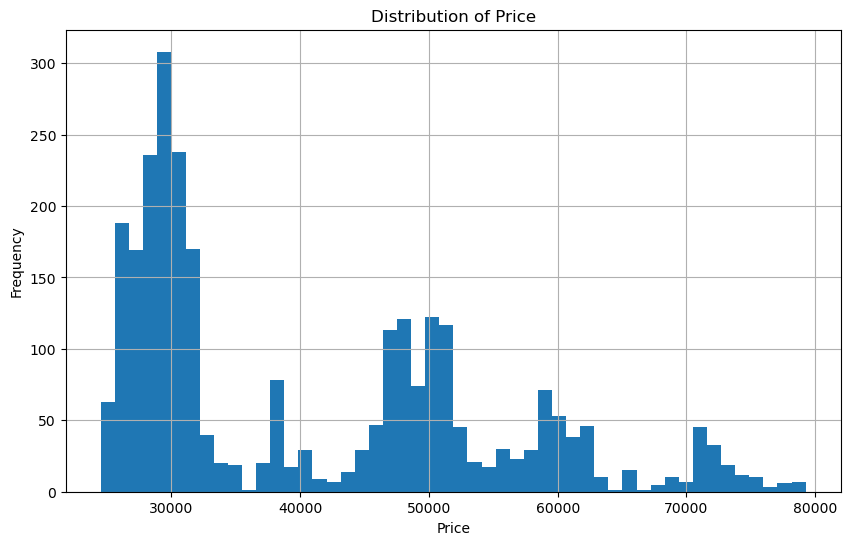

In [17]:
gold_df['Price'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [18]:
#next yearly analysis-this gives year wise count which would otherwise be of no use
gold_df.index=pd.DatetimeIndex(gold_df.Date)

In [21]:
gold_df.resample('Y').size()

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_24952\2657857014.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  gold_df.resample('Y').size()


Date
2014-12-31    268
2015-12-31    262
2016-12-31    259
2017-12-31    255
2018-12-31    256
2019-12-31    257
2020-12-31    258
2021-12-31    259
2022-12-31    257
2023-12-31    256
2024-12-31    219
Freq: YE-DEC, dtype: int64

In [22]:
gold_df.reset_index(drop=True)

,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17
...,...,...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051,24380,-0.55
2802,2014-01-04,29279,29279,29279,29279,0,-1.51
2803,2014-01-03,29727,30031,30125,29539,3050,-0.83
2804,2014-01-02,29975,29678,30050,29678,3140,1.47


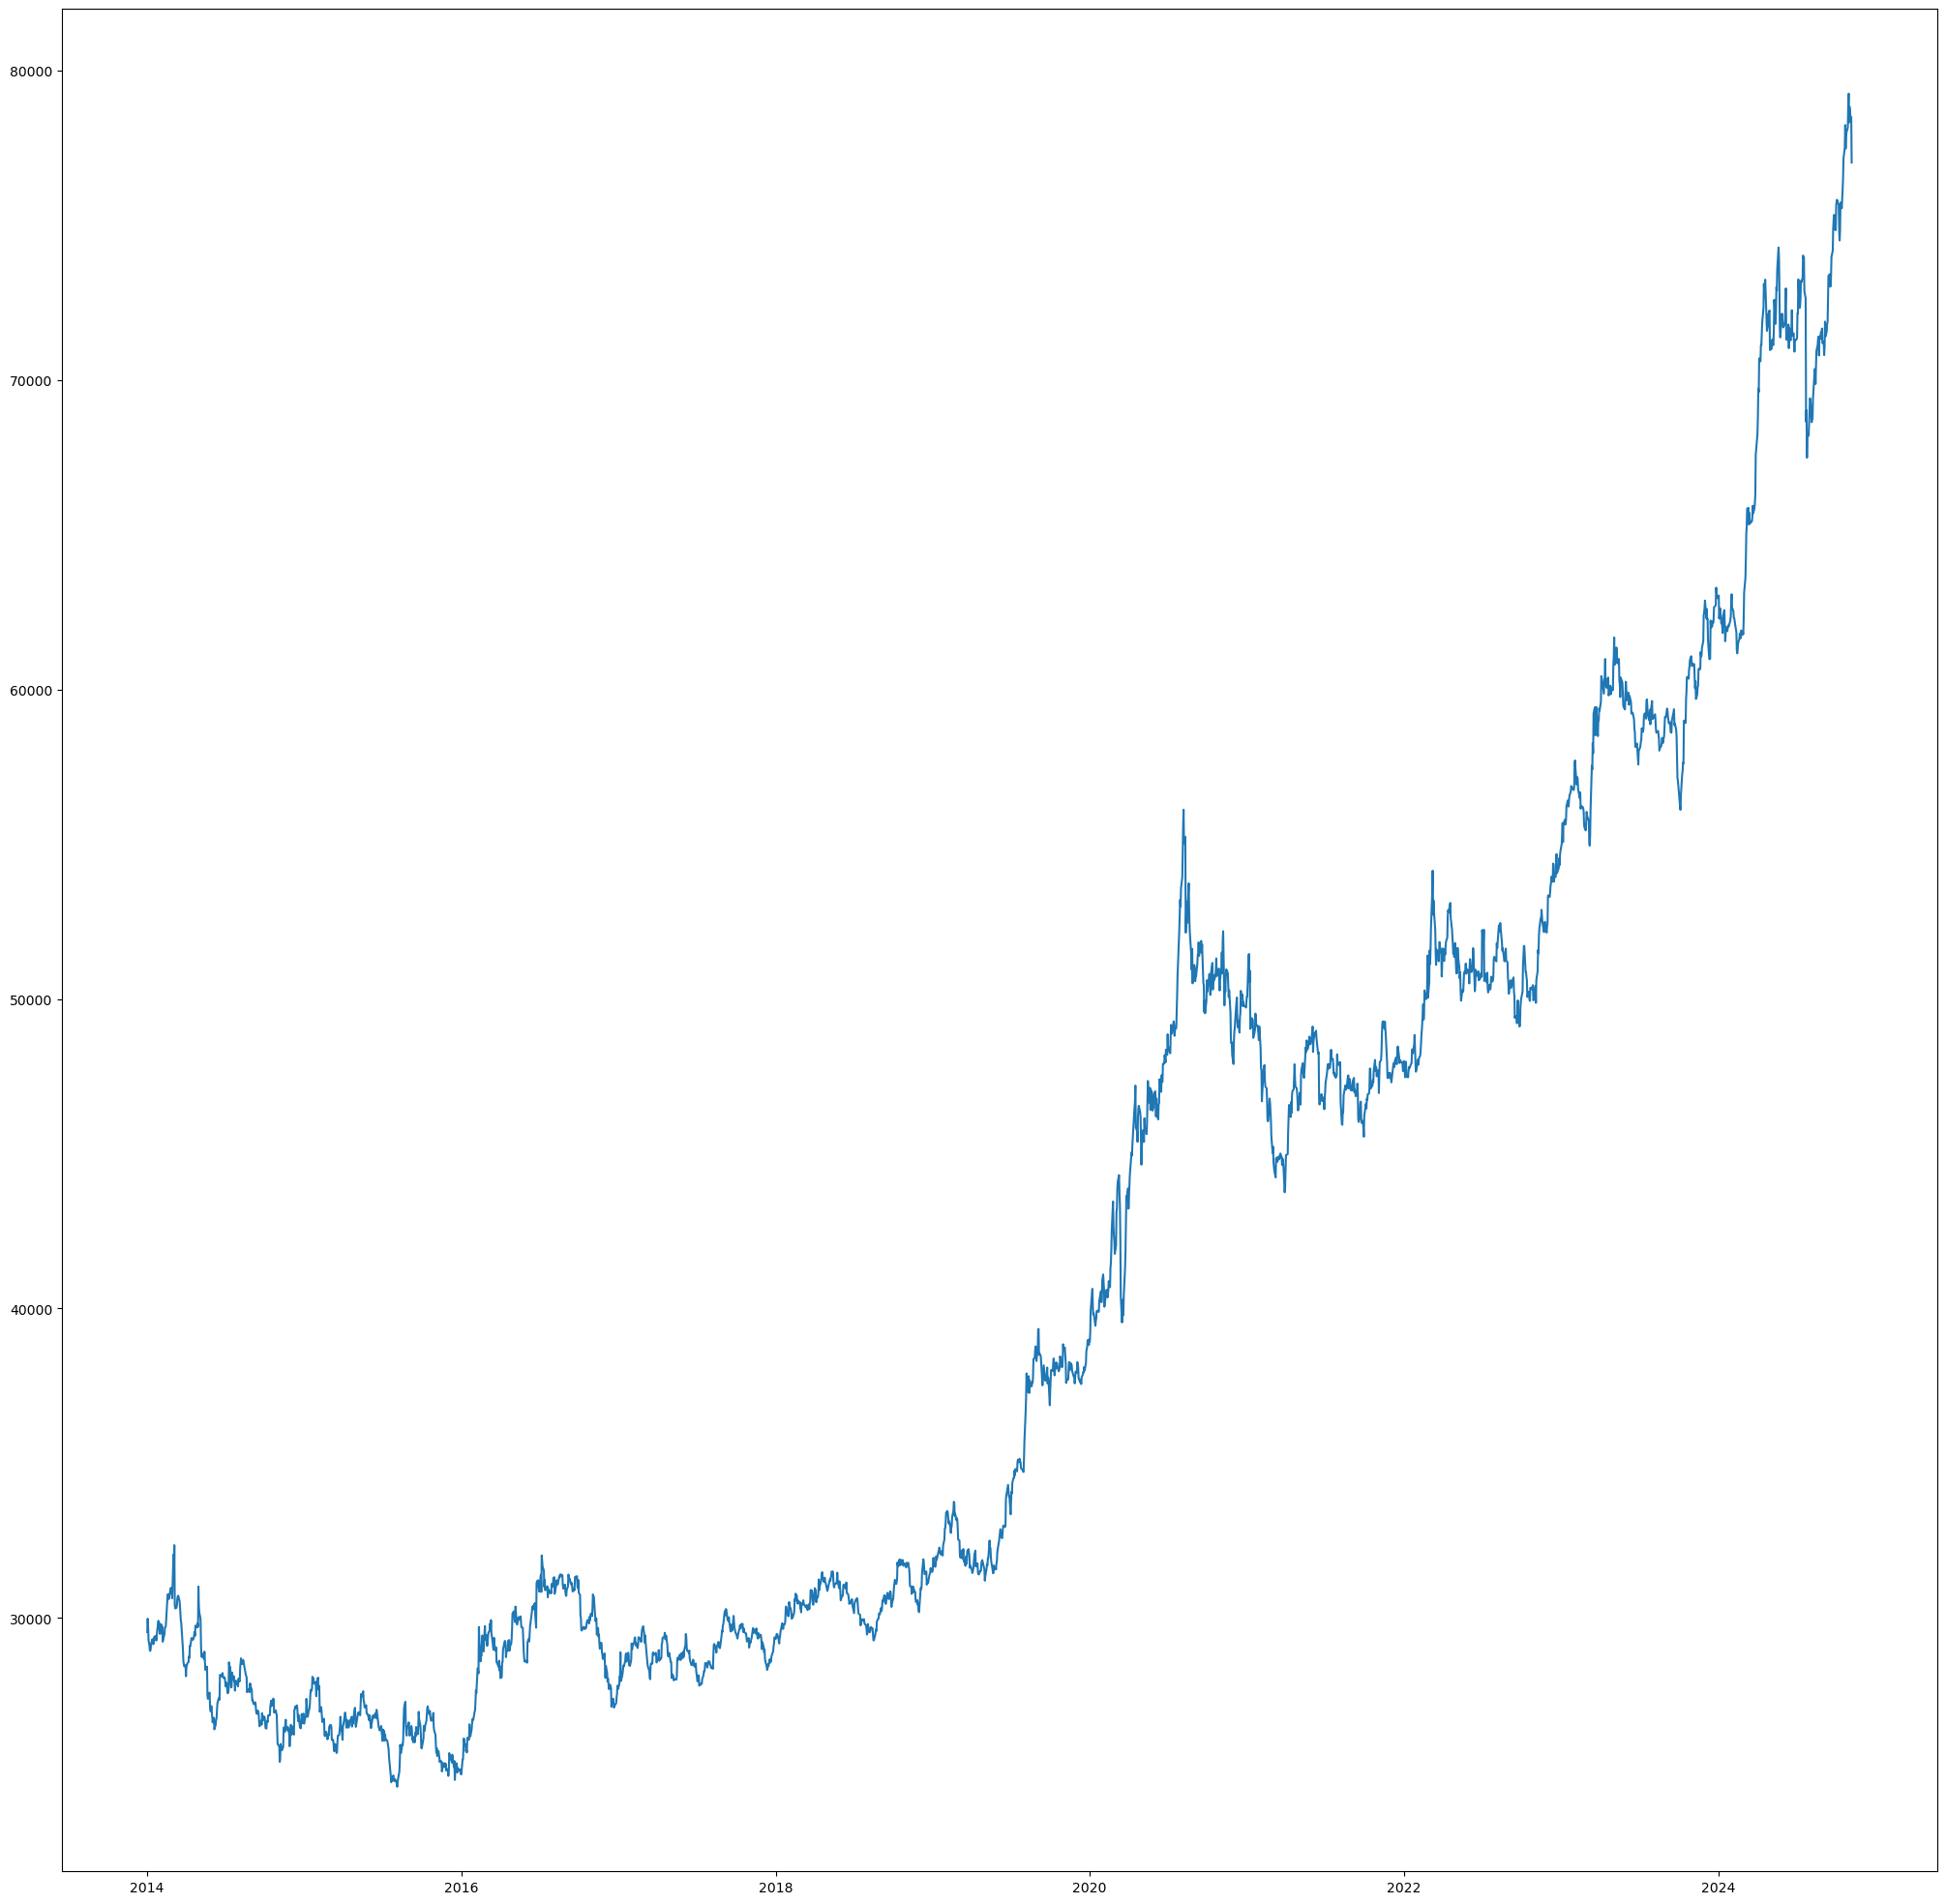

In [26]:
plt.figure(figsize=(25,25))
plt.plot(gold_df.groupby(gold_df['Date'])['Price'].mean())

In [32]:
gold_df.set_index('Date', inplace=True)
monthly_avg_price = gold_df['Price'].resample('ME').mean()

([<matplotlib.axis.XTick at 0x21536032b40>,
 [Text(16101.0, 0, 'Jan 2014'),
  Text(16282.0, 0, 'Jul 2014'),
  Text(16466.0, 0, 'Jan 2015'),
  Text(16647.0, 0, 'Jul 2015'),
  Text(16831.0, 0, 'Jan 2016'),
  Text(17013.0, 0, 'Jul 2016'),
  Text(17197.0, 0, 'Jan 2017'),
  Text(17378.0, 0, 'Jul 2017'),
  Text(17562.0, 0, 'Jan 2018'),
  Text(17743.0, 0, 'Jul 2018'),
  Text(17927.0, 0, 'Jan 2019'),
  Text(18108.0, 0, 'Jul 2019'),
  Text(18292.0, 0, 'Jan 2020'),
  Text(18474.0, 0, 'Jul 2020'),
  Text(18658.0, 0, 'Jan 2021'),
  Text(18839.0, 0, 'Jul 2021'),
  Text(19023.0, 0, 'Jan 2022'),
  Text(19204.0, 0, 'Jul 2022'),
  Text(19388.0, 0, 'Jan 2023'),
  Text(19569.0, 0, 'Jul 2023'),
  Text(19753.0, 0, 'Jan 2024'),
  Text(19935.0, 0, 'Jul 2024')])

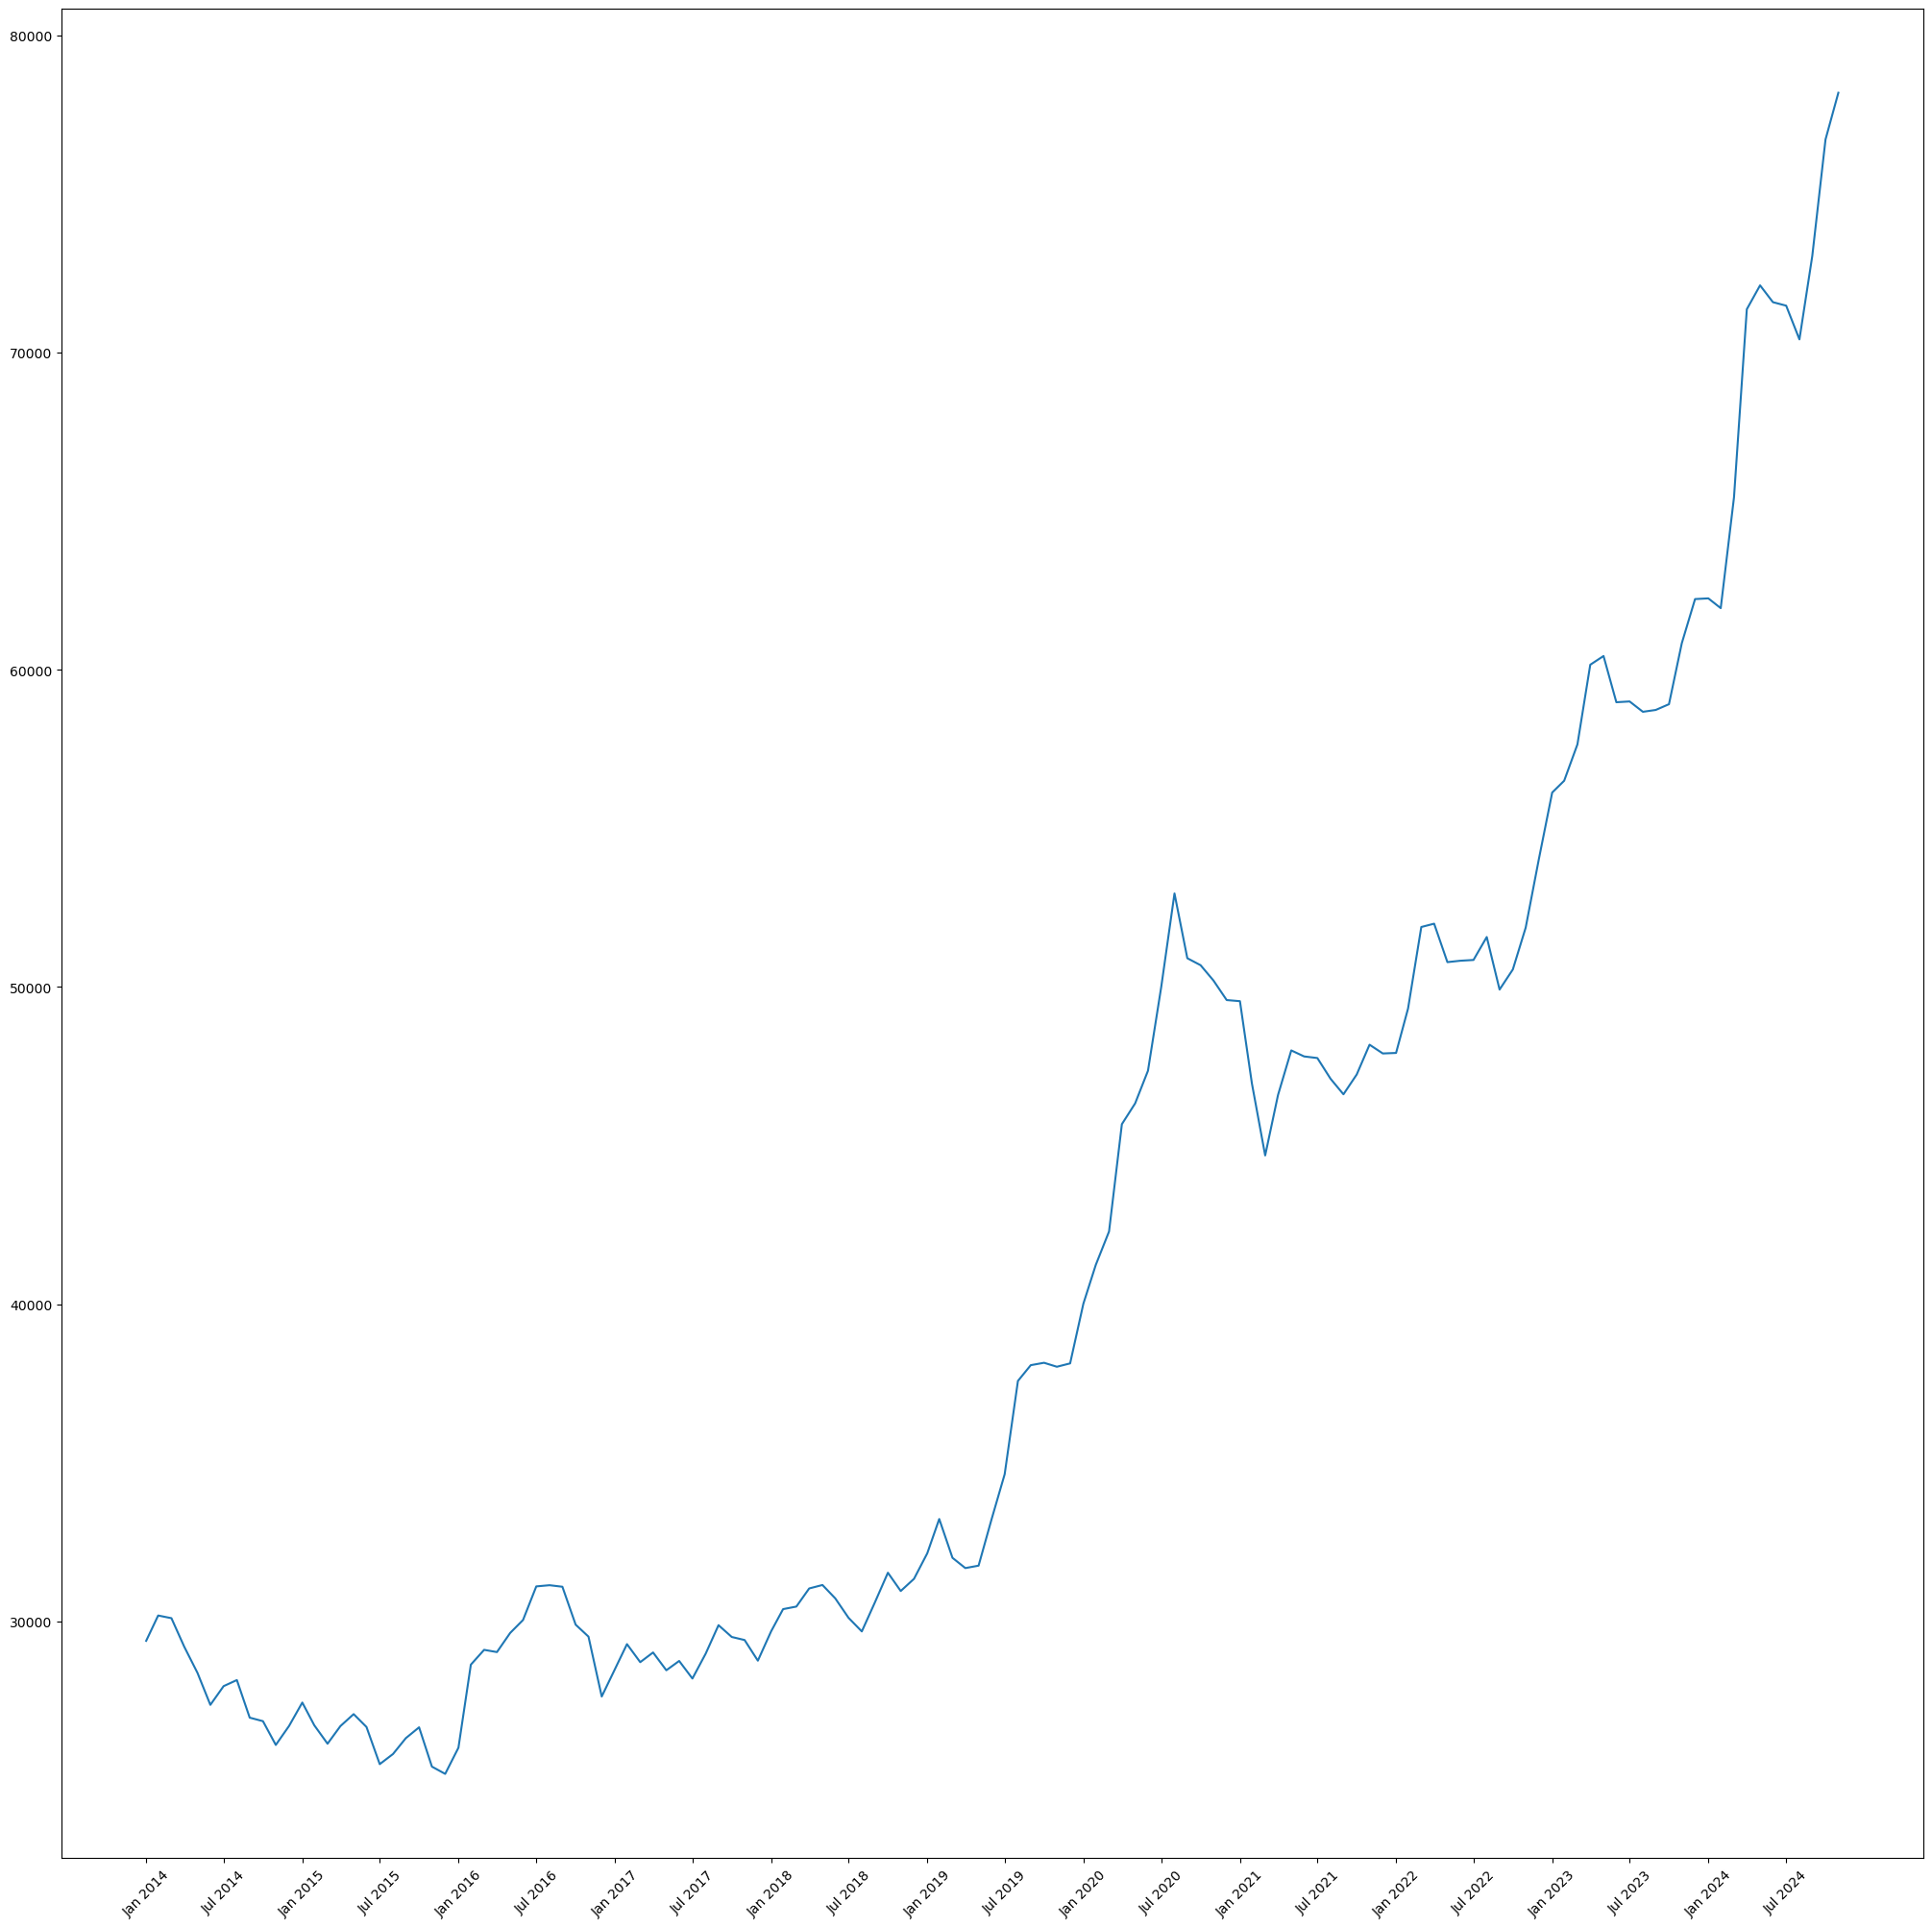

In [36]:
plt.figure(figsize=(25,25))
plt.plot(monthly_avg_price)
plt.xticks(monthly_avg_price.index[::6], monthly_avg_price.index.strftime('%b %Y')[::6], rotation=45)  # every 6 months


In [35]:
monthly_avg_price

Date
2014-01-31    29386.500000
2014-02-28    30184.450000
2014-03-31    30100.190476
2014-04-30    29199.521739
2014-05-31    28373.636364
                  ...     
2024-07-31    71475.913043
2024-08-31    70412.666667
2024-09-30    73038.857143
2024-10-31    76716.272727
2024-11-30    78187.500000
Freq: ME, Name: Price, Length: 131, dtype: float64

In [38]:
#doing the prediction using Prophet time series model

In [42]:
from prophet import Prophet

# Create an instance of the Prophet model
d = Prophet()


In [50]:
fin=gold_df['Price'].reset_index()

In [55]:
fin=fin.rename(columns={'Date':'ds','Price':'y'})

In [56]:
d.fit(fin)

19:20:23 - cmdstanpy - INFO - Chain [1] start processing
19:20:29 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future=d.make_future_dataframe(periods=365)
forecast=d.predict(future)

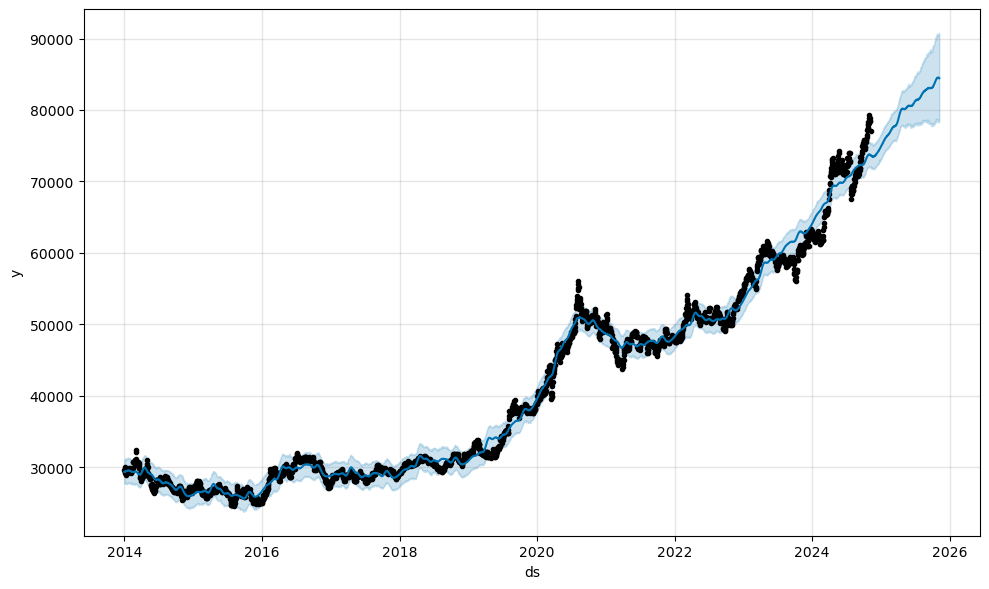

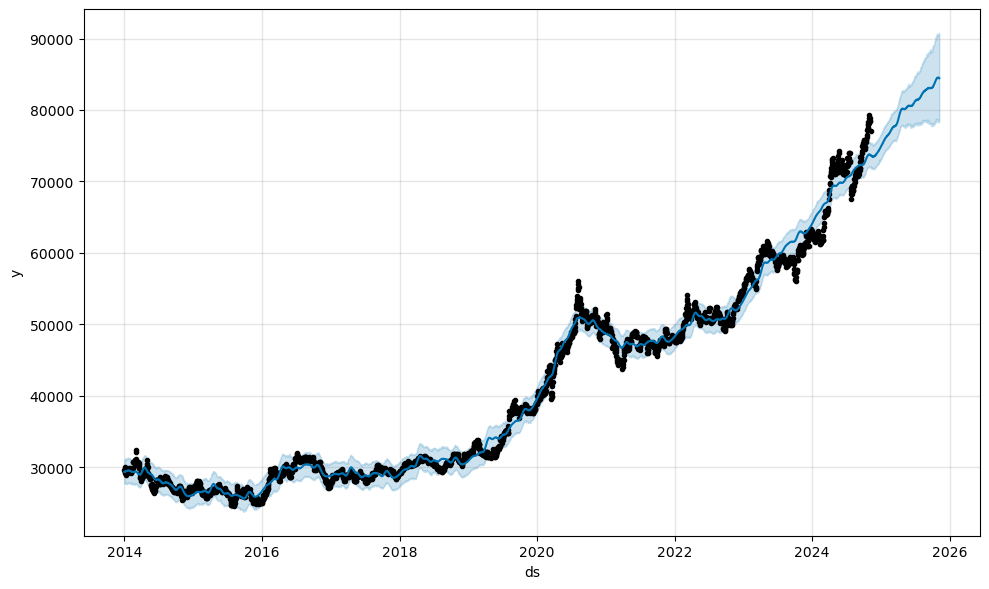

In [58]:
d.plot(forecast)

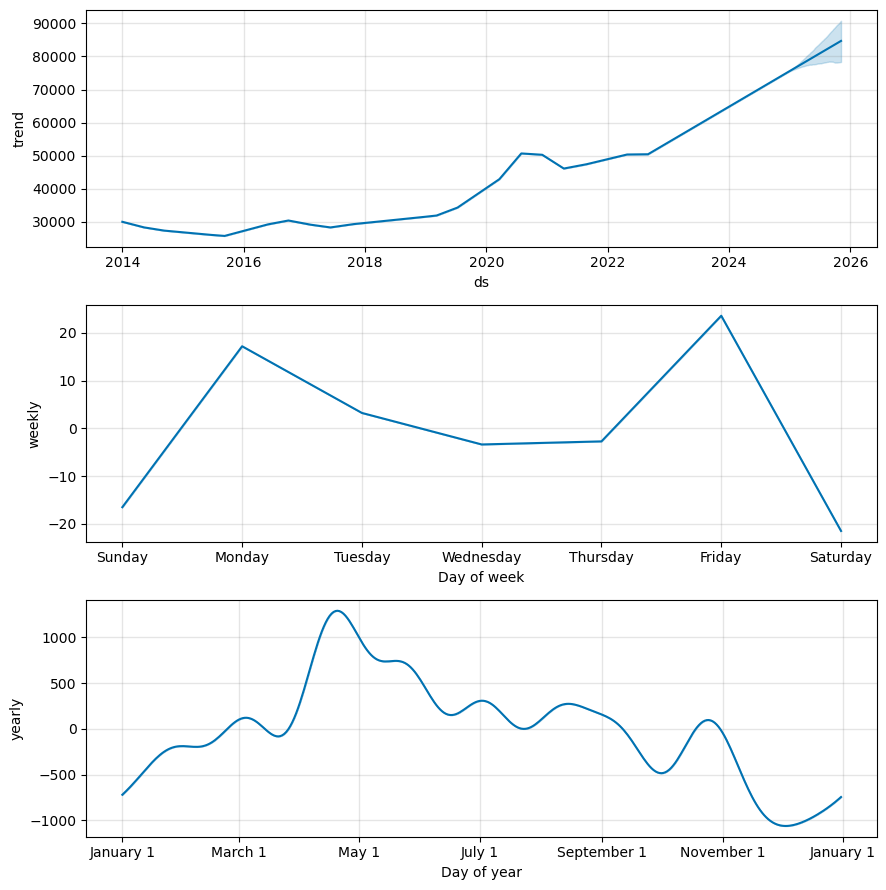

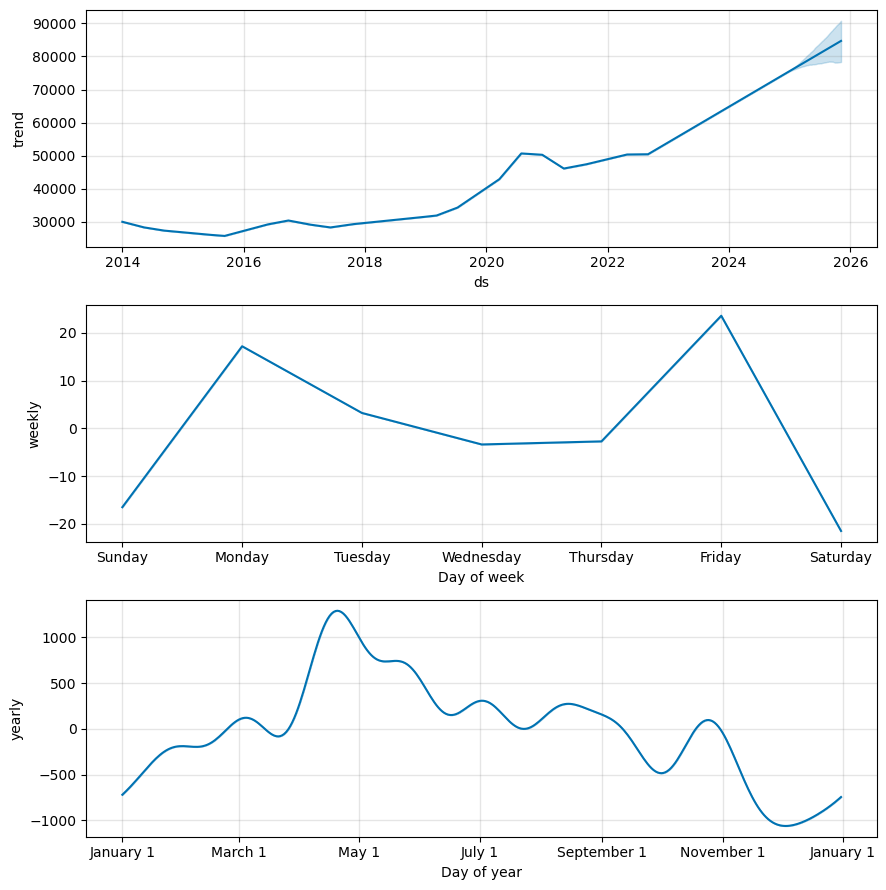

In [59]:
d.plot_components(forecast)

INTERPRETATIONS OF THE GRAPHS:
1) In the weekly trend it is noticed that the price increases on monday when the markets open and a similar trend is noticed on Friday when the markets close
2) In the yearly trend it is noticed that the price increases before May, this could be because of the Hindu festival called Akshay Tritiya, and then constant decline, with a mild peak around November
3) The model predicted the gold price for the year 2025 to reach a peak of 90000 or a low of around 78000, The current price of 22-carat gold per gram in Delhi today is ₹9,305 (as of 22nd April,2025)